In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#Defining a single sequential model
model = keras.Sequential([layers.Dense(units = 1, input_shape = [3])])

In [3]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[ 0.12063479],
        [-0.38778383],
        [ 0.49524963]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [4]:
import pandas as pd
import matplotlib

In [5]:
red_wine = pd.read_csv("red-wine.csv")
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
dense_model = keras.Sequential([
    layers.Dense(units=9, activation="relu", input_shape = [11]),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=1)
])

In [7]:
dense_model.compile(
    optimizer="adam",
    loss="mae",
)

In [8]:
Y =  red_wine.quality
X = red_wine.drop('quality',axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7)


In [10]:
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
Y_train = df_train['quality']
Y_test = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [11]:
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231,0.6
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615,0.4
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692,0.8
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154,0.6
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.469027,0.287671,0.569620,0.107692,0.064125,0.211268,0.120141,0.687738,0.504854,0.175758,0.153846,0.4
104,0.230088,0.253425,0.303797,0.100000,0.062392,0.056338,0.106007,0.451637,0.446602,0.090909,0.153846,0.4
815,0.548673,0.226027,0.417722,0.123077,0.112652,0.267606,0.113074,0.617669,0.359223,0.230303,0.369231,0.4
998,0.380531,0.493151,0.430380,0.038462,0.027730,0.042254,0.014134,0.416603,0.242718,0.090909,0.107692,0.6


In [12]:
history = dense_model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size= 256)

Epoch 1/10
5/5 [==============================] - 1s 53ms/step - loss: 0.3221 - val_loss: 16.7149
Epoch 2/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1898 - val_loss: 13.8024
Epoch 3/10
5/5 [==============================] - 0s 16ms/step - loss: 0.1403 - val_loss: 11.8947
Epoch 4/10
5/5 [==============================] - 0s 15ms/step - loss: 0.1277 - val_loss: 14.4624
Epoch 5/10
5/5 [==============================] - 0s 15ms/step - loss: 0.1288 - val_loss: 13.3659
Epoch 6/10
5/5 [==============================] - 0s 15ms/step - loss: 0.1192 - val_loss: 12.8316
Epoch 7/10
5/5 [==============================] - 0s 15ms/step - loss: 0.1152 - val_loss: 14.9092
Epoch 8/10
5/5 [==============================] - 0s 16ms/step - loss: 0.1156 - val_loss: 14.0352
Epoch 9/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1106 - val_loss: 13.7729
Epoch 10/10
5/5 [==============================] - 0s 16ms/step - loss: 0.1087 - val_loss: 14.3858


<AxesSubplot: >

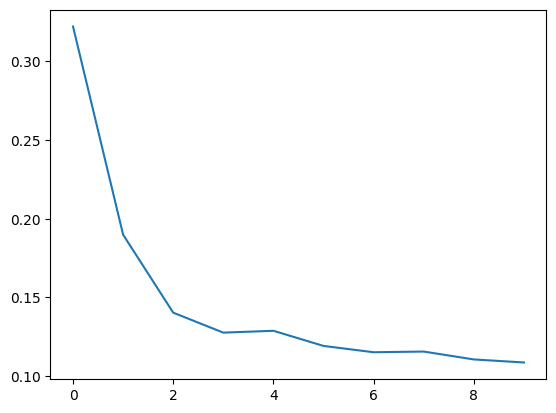

In [13]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()

In [14]:
pred = dense_model.predict(X_test)
pred

15/15 [==============================] - 0s 2ms/step


array([[23.29139  ],
       [ 6.171633 ],
       [ 9.36857  ],
       [17.332762 ],
       [ 7.1551204],
       [ 7.2260766],
       [14.90774  ],
       [27.265532 ],
       [ 9.982736 ],
       [ 9.531397 ],
       [12.045508 ],
       [17.368057 ],
       [ 7.183194 ],
       [24.388105 ],
       [ 6.680965 ],
       [ 6.4554577],
       [37.810448 ],
       [16.751133 ],
       [12.186321 ],
       [12.872733 ],
       [13.64949  ],
       [ 9.879114 ],
       [14.794295 ],
       [18.77136  ],
       [30.915121 ],
       [13.2399845],
       [ 9.596128 ],
       [18.4657   ],
       [ 7.099747 ],
       [ 8.671017 ],
       [18.185003 ],
       [30.110662 ],
       [ 9.152321 ],
       [ 6.9136376],
       [ 8.583806 ],
       [12.115947 ],
       [21.847181 ],
       [ 7.036152 ],
       [29.527044 ],
       [22.5779   ],
       [ 6.687557 ],
       [31.07055  ],
       [14.332461 ],
       [29.471529 ],
       [15.171863 ],
       [20.375727 ],
       [18.38727  ],
       [27.79

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from math import sqrt
#acc = accuracy_score(y_pred=pred,y_true = Y_test)
mse = mean_squared_error(y_pred=pred,y_true = Y_test)
sqrt(mse)

16.718757260822496

In [63]:
tf.keras.utils.set_random_seed(0)


dense_model = keras.Sequential([
    layers.Input(shape=[11]),
    layers.Dense(units=512, activation="relu"),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=1)
])

dense_model.compile(
    optimizer="adam",
    loss="mae",
)
history = dense_model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size= 1)
pred = dense_model.predict(X_test)
mse = mean_squared_error(y_pred=pred,y_true = Y_test)
sqrt(mse)


Epoch 1/10
1119/1119 [==============================] - 6s 5ms/step - loss: 0.1256 - val_loss: 2.8810
Epoch 2/10
1119/1119 [==============================] - 6s 5ms/step - loss: 0.1104 - val_loss: 3.3986
Epoch 3/10
1119/1119 [==============================] - 6s 5ms/step - loss: 0.1097 - val_loss: 13.5678
Epoch 4/10
1119/1119 [==============================] - 6s 5ms/step - loss: 0.1069 - val_loss: 4.9526
Epoch 5/10
1119/1119 [==============================] - 6s 5ms/step - loss: 0.1041 - val_loss: 1.2669
Epoch 6/10
1119/1119 [==============================] - 6s 5ms/step - loss: 0.1025 - val_loss: 4.0941
Epoch 7/10
1119/1119 [==============================] - 6s 5ms/step - loss: 0.0984 - val_loss: 0.3543
Epoch 8/10
1119/1119 [==============================] - 6s 5ms/step - loss: 0.0974 - val_loss: 4.0929
Epoch 9/10
1119/1119 [==============================] - 6s 5ms/step - loss: 0.0971 - val_loss: 3.8878
Epoch 10/10
15/15 [==============================] - 0s 2ms/step


2.2285150004344074

<AxesSubplot: >

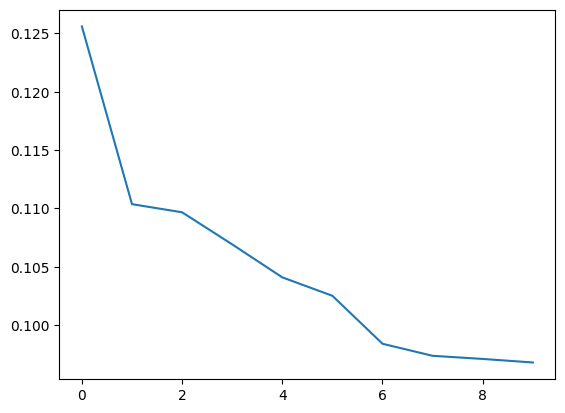

In [64]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()